In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV 

In [604]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [605]:
train_df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [606]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [607]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [608]:
train_df.groupby(['Pclass'], as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [609]:
train_df.groupby(['Sex'], as_index = False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [610]:
train_df.groupby(['SibSp'], as_index = False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [611]:
train_df.groupby(['Parch'], as_index = False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [612]:
train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch']+1
test_df['Family_Size'] = test_df['SibSp'] + test_df['Parch']+1

In [613]:
train_df.groupby(['Family_Size'], as_index = False)['Survived'].mean()

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [614]:
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6:'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
train_df['Family_Size_Grouped'] = train_df['Family_Size'].map(family_map)
test_df['Family_Size_Grouped'] = test_df['Family_Size'].map(family_map)

In [615]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          418 non-null    int64  
 1   Pclass               418 non-null    int64  
 2   Name                 418 non-null    object 
 3   Sex                  418 non-null    object 
 4   Age                  332 non-null    float64
 5   SibSp                418 non-null    int64  
 6   Parch                418 non-null    int64  
 7   Ticket               418 non-null    object 
 8   Fare                 417 non-null    float64
 9   Cabin                91 non-null     object 
 10  Embarked             418 non-null    object 
 11  Family_Size          418 non-null    int64  
 12  Family_Size_Grouped  418 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 42.6+ KB


In [616]:
train_df.groupby(['Family_Size_Grouped'], as_index = False)['Survived'].mean()

,Family_Size_Grouped,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


In [617]:
train_df.groupby(['Embarked'], as_index = False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [618]:
#train_df.drop(columns=['PassengerID'])

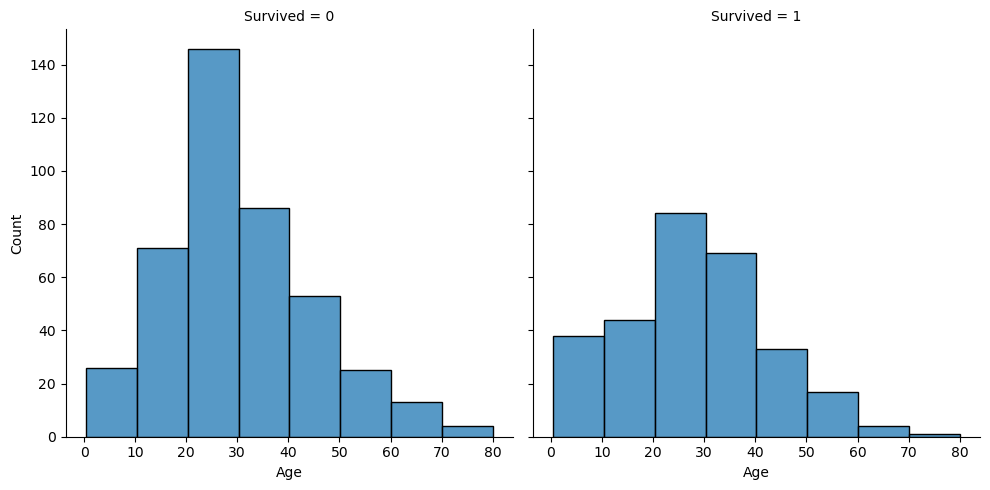

In [619]:
sns.displot(train_df, x='Age', col='Survived', binwidth=10, height=5)
plt.show()

In [620]:
train_df['Age_Cut'] = pd.qcut(train_df['Age'],8)
test_df['Age_Cut'] = pd.qcut(test_df['Age'],8)

In [621]:
train_df.groupby(['Age_Cut'], as_index = False)['Survived'].mean()


C:\Users\maxco\AppData\Local\Temp\ipykernel_2916\35886402.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Age_Cut'], as_index = False)['Survived'].mean()


,Age_Cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [622]:
train_df.loc[train_df['Age'] <= 16, 'Age'] = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 20.125), 'Age'] = 1
train_df.loc[(train_df['Age'] > 20.125) & (train_df['Age'] <= 24), 'Age'] = 2
train_df.loc[(train_df['Age'] > 24) & (train_df['Age'] <= 28), 'Age'] = 3
train_df.loc[(train_df['Age'] > 28) & (train_df['Age'] <= 32.312), 'Age'] = 4
train_df.loc[(train_df['Age'] > 32.312) & (train_df['Age'] <= 38), 'Age'] = 5
train_df.loc[(train_df['Age'] > 38) & (train_df['Age'] <= 47), 'Age'] = 6
train_df.loc[(train_df['Age'] > 47) & (train_df['Age'] <= 80), 'Age'] = 7
train_df.loc[train_df['Age'] > 80, 'Age'] 

test_df.loc[test_df['Age'] <= 16, 'Age'] = 0
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 20.125), 'Age'] = 1
test_df.loc[(test_df['Age'] > 20.125) & (test_df['Age'] <= 24), 'Age'] = 2
test_df.loc[(test_df['Age'] > 24) & (test_df['Age'] <= 28), 'Age'] = 3
test_df.loc[(test_df['Age'] > 28) & (test_df['Age'] <= 32.312), 'Age'] = 4
test_df.loc[(test_df['Age'] > 32.312) & (test_df['Age'] <= 38), 'Age'] = 5
test_df.loc[(test_df['Age'] > 38) & (test_df['Age'] <= 47), 'Age'] = 6
test_df.loc[(test_df['Age'] > 47) & (test_df['Age'] <= 80), 'Age'] = 7
test_df.loc[test_df['Age'] > 80, 'Age'] 


Series([], Name: Age, dtype: float64)

In [623]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]"


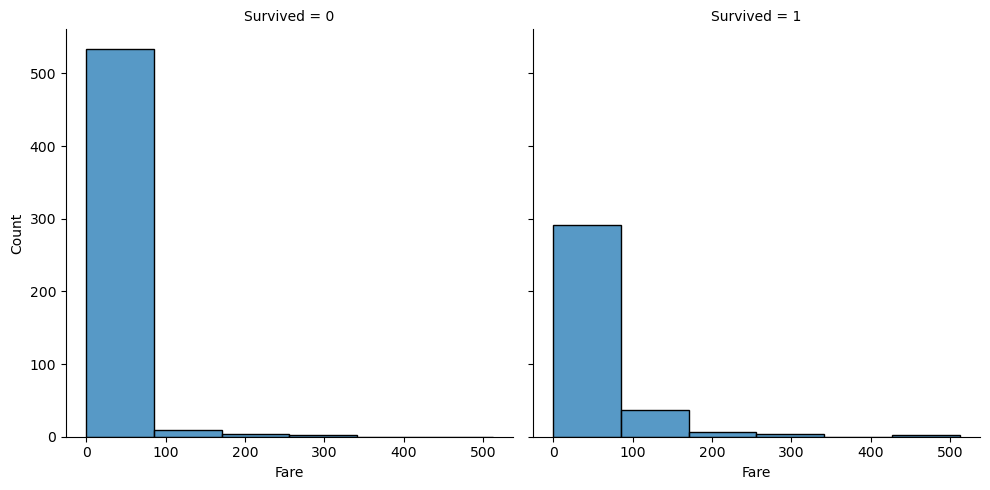

In [624]:
sns.displot(train_df, x='Fare', col='Survived', binwidth = 80, height = 5)
plt.show()

In [625]:
train_df['Fare_Cut'] = pd.qcut(train_df['Fare'],6)
test_df['Fare_Cut'] = pd.qcut(train_df['Fare'],6)

In [626]:
train_df.groupby(['Fare_Cut'], as_index = False)['Survived'].mean()

C:\Users\maxco\AppData\Local\Temp\ipykernel_2916\3334708280.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Fare_Cut'], as_index = False)['Survived'].mean()


,Fare_Cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [627]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,3.462185,0.523008,0.381594,32.204208,1.904602
std,257.353842,0.486592,0.836071,2.316318,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,1.250000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,3.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,5.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,7.000000,8.000000,6.000000,512.329200,11.000000


In [628]:
train_df.loc[train_df['Fare'] <= 7.775, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.775) & (train_df['Fare'] <= 8.662), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 8.662) & (train_df['Fare'] <= 14.454), 'Fare'] = 2
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 26), 'Fare'] = 3
train_df.loc[(train_df['Fare'] > 26) & (train_df['Fare'] <= 52.369), 'Fare'] = 4
train_df.loc[(train_df['Fare'] > 52.369) & (train_df['Fare'] <= 512.329), 'Fare'] = 5
train_df.loc[train_df['Fare'] > 512.329, 'Fare'] 

test_df.loc[test_df['Fare'] <= 7.775, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.775) & (test_df['Fare'] <= 8.662), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 8.662) & (test_df['Fare'] <= 14.454), 'Fare'] = 2
test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <= 26), 'Fare'] = 3
test_df.loc[(test_df['Fare'] > 26) & (test_df['Fare'] <= 52.369), 'Fare'] = 4
test_df.loc[(test_df['Fare'] > 52.369) & (test_df['Fare'] <= 512.329), 'Fare'] = 5
test_df.loc[test_df['Fare'] > 512.329, 'Fare'] 



343    512.3292
Name: Fare, dtype: float64

In [629]:
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [630]:
train_df['Title'] = train_df['Name'].str.split(pat= ", ", expand=True)[1].str.split(pat='.', expand=True)[0].apply(lambda x:x.strip())
test_df['Title'] = test_df['Name'].str.split(pat= ", ", expand=True)[1].str.split(pat='.', expand=True)[0].apply(lambda x:x.strip())

In [631]:
train_df.groupby(['Title'], as_index = False)['Survived'].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [632]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,3.462185,0.523008,0.381594,4.206496,1.904602
std,257.353842,0.486592,0.836071,2.316318,1.102743,0.806057,29.600082,1.613459
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,1.250000,0.000000,0.000000,1.000000,1.000000
50%,446.000000,0.000000,3.000000,3.000000,0.000000,0.000000,3.000000,1.000000
75%,668.500000,1.000000,3.000000,5.000000,1.000000,0.000000,4.000000,2.000000
max,891.000000,1.000000,3.000000,7.000000,8.000000,6.000000,512.329200,11.000000


In [633]:
train_df['Title'].count()

891

In [634]:
train_df.groupby(['Title'], as_index = False)['Survived'].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [635]:
train_df.replace({'Capt': 'Military',
                  'Col': 'Military',
                  'Major': 'Military',
                  'Jonkheer': 'Noble',
                  'the Countess': 'Noble',
                    'Don': 'Noble',
                    'Lady': 'Noble',
                    'Sir': 'Noble',
                    'Mlle': 'Noble',
                    'Ms': 'Noble',
                    'Mme': 'Noble',
                    }, inplace=True)

test_df.replace({'Capt': 'Military',
                  'Col': 'Military',
                  'Major': 'Military',
                  'Jonkheer': 'Noble',
                  'the Countess': 'Noble',
                    'Don': 'Noble',
                    'Lady': 'Noble',
                    'Sir': 'Noble',
                    'Mlle': 'Noble',
                    'Ms': 'Noble',
                    'Mme': 'Noble',
                    }, inplace = True)


In [636]:
train_df.groupby(['Title'], as_index = False)['Survived'].agg(['count','mean'])

,Title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Military,5,0.400000
3,Miss,182,0.697802
4,Mr,517,0.156673
5,Mrs,125,0.792000
6,Noble,9,0.777778
7,Rev,6,0.000000


In [637]:
train_df['Name_Length'] = train_df['Name'].apply(lambda x: len(x))
test_df['Name_Length'] = test_df['Name'].apply(lambda x: len(x))

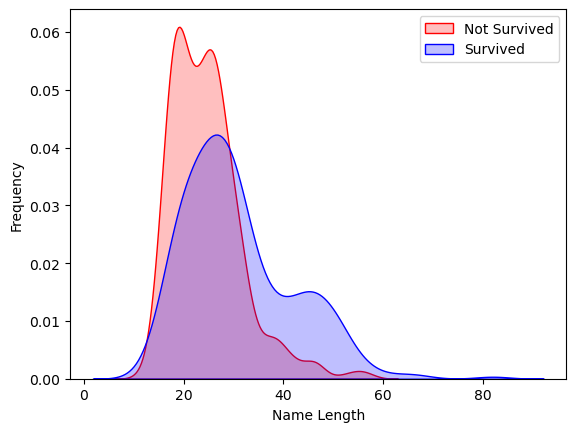

In [638]:
g = sns.kdeplot(
    train_df['Name_Length'][ (train_df['Survived'] == 0) & (train_df['Name_Length'].notnull()) ], 
    color='red', fill=True, label='Not Survived'
)
sns.kdeplot(
    train_df['Name_Length'][ (train_df['Survived'] == 1) & (train_df['Name_Length'].notnull()) ], 
    color='blue', fill=True, label='Survived', ax=g
)

g.set_xlabel('Name Length')
g.set_ylabel('Frequency')
g.legend()
plt.show()

In [639]:
train_df['Name_LengthGB'] = pd.qcut(train_df['Name_Length'],8)
test_df['Name_LengthGB'] = pd.qcut(test_df['Name_Length'],8)

In [640]:
train_df.groupby(['Name_LengthGB'], as_index = False)['Survived'].mean()

C:\Users\maxco\AppData\Local\Temp\ipykernel_2916\3439475250.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Name_LengthGB'], as_index = False)['Survived'].mean()


,Name_LengthGB,Survived
0,"(11.999, 18.0]",0.214286
1,"(18.0, 20.0]",0.252427
2,"(20.0, 23.0]",0.307692
3,"(23.0, 25.0]",0.346939
4,"(25.0, 27.25]",0.292929
5,"(27.25, 30.0]",0.428571
6,"(30.0, 38.0]",0.517241
7,"(38.0, 82.0]",0.745283


In [641]:
train_df.loc[train_df['Name_Length'] <= 18, 'Name_Size'] = 0
train_df.loc[(train_df['Name_Length'] > 18) & (train_df['Name_Length'] <= 20), 'Name_Size'] = 1
train_df.loc[(train_df['Name_Length'] > 20) & (train_df['Name_Length'] <= 23), 'Name_Size'] = 2
train_df.loc[(train_df['Name_Length'] > 23) & (train_df['Name_Length'] <= 25), 'Name_Size'] = 3
train_df.loc[(train_df['Name_Length'] > 25) & (train_df['Name_Length'] <= 27.25), 'Name_Size'] = 4
train_df.loc[(train_df['Name_Length'] > 27.25) & (train_df['Name_Length'] <= 30), 'Name_Size'] = 5
train_df.loc[(train_df['Name_Length'] > 30) & (train_df['Name_Length'] <= 38), 'Name_Size'] = 6
train_df.loc[(train_df['Name_Length'] > 38) & (train_df['Name_Length'] <= 82), 'Name_Size'] = 7
train_df.loc[train_df['Name_Length'] > 82, 'Name_Size'] 

test_df.loc[test_df['Name_Length'] <= 18, 'Name_Size'] = 0
test_df.loc[(test_df['Name_Length'] > 18) & (test_df['Name_Length'] <= 20), 'Name_Size'] = 1
test_df.loc[(test_df['Name_Length'] > 20) & (test_df['Name_Length'] <= 23), 'Name_Size'] = 2
test_df.loc[(test_df['Name_Length'] > 23) & (test_df['Name_Length'] <= 25), 'Name_Size'] = 3
test_df.loc[(test_df['Name_Length'] > 25) & (test_df['Name_Length'] <= 27.25), 'Name_Size'] = 4
test_df.loc[(test_df['Name_Length'] > 27.25) & (test_df['Name_Length'] <= 30), 'Name_Size'] = 5
test_df.loc[(test_df['Name_Length'] > 30) & (test_df['Name_Length'] <= 38), 'Name_Size'] = 6
test_df.loc[(test_df['Name_Length'] > 38) & (test_df['Name_Length'] <= 82), 'Name_Size'] = 7
test_df.loc[test_df['Name_Length'] > 82, 'Name_Size'] 





Series([], Name: Name_Size, dtype: float64)

In [642]:
train_df['Ticket_Number'] = train_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))
test_df['Ticket_Number'] = test_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))

In [643]:
train_df['Ticket_Number'].head()

0      21171
1      17599
2    3101282
3     113803
4     373450
Name: Ticket_Number, dtype: object

In [644]:
train_df.groupby(['Ticket_Number'], as_index = False)['Survived'].agg(['count','mean']).sort_values('count',ascending=False)

,Ticket_Number,count,mean
464,347082,7,0.000000
196,2343,7,0.000000
94,1601,7,0.714286
168,2144,6,0.000000
468,347088,6,0.000000
...,...,...,...
271,2662,1,0.000000
272,2663,1,1.000000
273,2664,1,0.000000
276,2667,1,1.000000


In [645]:
train_df.groupby('Ticket_Number')['Ticket_Number'].transform('count')

0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: Ticket_Number, Length: 891, dtype: int64

In [646]:
train_df['Ticket_Number_Counts'] = train_df.groupby('Ticket_Number')['Ticket_Number'].transform('count')
test_df['Ticket_Number_Counts'] = test_df.groupby('Ticket_Number')['Ticket_Number'].transform('count')

In [647]:
train_df.groupby(['Ticket_Number_Counts'], as_index = False)['Survived'].agg(['count','mean']).sort_values('count',ascending=False)

,Ticket_Number_Counts,count,mean
0,1,544,0.295956
1,2,188,0.569149
2,3,66,0.712121
3,4,44,0.500000
6,7,21,0.238095
5,6,18,0.000000
4,5,10,0.000000


In [648]:
train_df['Ticket'].str.split(pat=" ", expand=True)

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
886,211536,None,None
887,112053,None,None
888,W./C.,6607,None
889,111369,None,None


In [649]:
train_df['Ticket_Location'] = np.where(
    train_df['Ticket'].str.split(pat=" ", expand=True)[1].notna(),
    train_df['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), ""
)

test_df['Ticket_Location'] = np.where(
    test_df['Ticket'].str.split(pat=" ", expand=True)[1].notna(),
    test_df['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), ""
)



In [650]:
train_df['Ticket_Location'] = train_df['Ticket_Location'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./Paris':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C'})
test_df['Ticket_Location'] = test_df['Ticket_Location'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./Paris':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C'})

In [651]:
train_df.groupby(['Ticket_Location'], as_index = False)['Survived'].agg(['count','mean'])


,Ticket_Location,count,mean
0,,665,0.383459
1,A/4,6,0.000000
2,A/5,21,0.095238
3,A/S,1,0.000000
4,A4.,1,0.000000
5,C,5,0.400000
6,C.A./SOTON,1,0.000000
7,CA,33,0.393939
8,CA.,8,0.125000
9,F.C.,1,0.000000


In [652]:
train_df['Cabin'] = train_df['Cabin'].fillna('U')
train_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in train_df['Cabin']])

test_df['Cabin'] = test_df['Cabin'].fillna('U')
test_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in test_df['Cabin']])

In [653]:
train_df['Cabin']

0      U
1      C
2      U
3      C
4      U
      ..
886    U
887    B
888    U
889    C
890    U
Name: Cabin, Length: 891, dtype: object

In [654]:
train_df['Cabin_Assigned'] = train_df['Cabin'].apply(lambda x: 0 if x=='U' else 1)
test_df['Cabin_Assigned'] = test_df['Cabin'].apply(lambda x: 0 if x=='U' else 1)

In [655]:
train_df['Cabin_Assigned']

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Cabin_Assigned, Length: 891, dtype: int64

In [656]:
train_df.groupby(['Cabin_Assigned'], as_index = False)['Survived'].agg(['count','mean'])


,Cabin_Assigned,count,mean
0,0,687,0.299854
1,1,204,0.666667


In [657]:
train_df.shape


(891, 24)

In [658]:
test_df.shape

(418, 23)

In [659]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   PassengerId           891 non-null    int64   
 1   Survived              891 non-null    int64   
 2   Pclass                891 non-null    int64   
 3   Name                  891 non-null    object  
 4   Sex                   891 non-null    object  
 5   Age                   714 non-null    float64 
 6   SibSp                 891 non-null    int64   
 7   Parch                 891 non-null    int64   
 8   Ticket                891 non-null    object  
 9   Fare                  891 non-null    float64 
 10  Cabin                 891 non-null    object  
 11  Embarked              889 non-null    object  
 12  Family_Size           891 non-null    int64   
 13  Family_Size_Grouped   891 non-null    object  
 14  Age_Cut               714 non-null    category
 15  Fare_C

In [660]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   PassengerId           418 non-null    int64   
 1   Pclass                418 non-null    int64   
 2   Name                  418 non-null    object  
 3   Sex                   418 non-null    object  
 4   Age                   332 non-null    float64 
 5   SibSp                 418 non-null    int64   
 6   Parch                 418 non-null    int64   
 7   Ticket                418 non-null    object  
 8   Fare                  417 non-null    float64 
 9   Cabin                 418 non-null    object  
 10  Embarked              418 non-null    object  
 11  Family_Size           418 non-null    int64   
 12  Family_Size_Grouped   418 non-null    object  
 13  Age_Cut               332 non-null    category
 14  Fare_Cut              418 non-null    category
 15  Title 

In [661]:
train_df['Age'].fillna(train_df['Age'].mean(),inplace=True)
train_df['Age'].fillna(train_df['Age'].mean(),inplace=True)
test_df['Age'].fillna(train_df['Age'].mean(),inplace=True)

C:\Users\maxco\AppData\Local\Temp\ipykernel_2916\1793762458.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].mean(),inplace=True)
C:\Users\maxco\AppData\Local\Temp\ipykernel_2916\1793762458.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [662]:
ohe = OneHotEncoder(sparse_output=False)
ode = OrdinalEncoder
SI = SimpleImputer(strategy='most_frequent')


In [663]:
ode_cols = ['Family_Size_Grouped']
ohe_cols = ['Sex','Embarked']

In [664]:
X = train_df.drop(['Survived'], axis=1)
y = train_df['Survived']
X_test = test_df.drop(['Age_Cut','Fare_Cut'], axis=1)


In [665]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2,stratify=y,random_state=21)

In [666]:
ordinal_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)),
])


In [667]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown='ignore',sparse_output=False)),
])

In [668]:
col_trans = ColumnTransformer(transformers=[('impute', SI, ['Age']),
                                            ('ord_pipeline', ordinal_pipeline, ode_cols),
                                            ('ohe_pipeline', ohe_pipeline, ohe_cols),
                                            ('passthrough', 'passthrough', ['Pclass','Ticket_Number_Counts','Cabin_Assigned', 'Name_Size', 'Age'])
                                             ],
                                              remainder='drop', n_jobs=-1)

In [669]:
rfc = RandomForestClassifier()

In [670]:
param_grid = {
    'n_estimators': [100, 150, 200],
    'min_samples_split': [5, 10, 15],
    'max_depth': [8, 9, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
    
}



In [671]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [672]:
pipefinalrfc = make_pipeline(col_trans, CV_rfc)
pipefinalrfc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                  ['Pclass',
                                                   'Ticket_Number_Counts',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [8, 9, 10],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15],
                                          'n_estimators': [100, 150, 200]}))])

In [673]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
0.8244361272530287


In [674]:
dtc = DecisionTreeClassifier()

In [675]:
param_grid = {
    'min_samples_split': [5, 10, 15],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
    
}

In [676]:
CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [677]:
pipefinaldtc = make_pipeline(col_trans, CV_dtc)
pipefinaldtc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'Ticket_Number_Counts',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 20, 30],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15]}))])

In [678]:
print(CV_dtc.best_params_)
print(CV_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 15}
0.8187924751305033


In [679]:
knn = KNeighborsClassifier()

In [680]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform','distance'],
    'algorithm': ['auto','ball_tree','kd_tree','brute'],
    'p': [1,2],  
}

In [683]:
CV_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [685]:
pipefinalknn = make_pipeline(col_trans, CV_knn)
pipefinalknn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'Ticket_Number_Counts',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=KNeighborsClassifier(),
                              param_grid={'algorithm': ['auto', 'ball_tree',
                                                        'kd_tree', 'brute'],
                                          'n_neighbors': [3, 5, 7, 9, 11],
                                          'p': [1, 2],
                                          'weights': ['uniform',
                                                      'distance']}))])

In [687]:
print(CV_knn.best_params_)
print(CV_knn.best_score_)

{'algorithm': 'brute', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
0.7991923569388358


In [689]:
svc = SVC()

In [691]:
param_grid = {
    'C': [100,10,1.0,0.1,0.001,0.0001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}

In [693]:
CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [695]:
pipefinalsvc = make_pipeline(col_trans, CV_svc)
pipefinalsvc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'Ticket_Number_Counts',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=SVC(),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.001,
                                                0.0001],
                                          'kernel': ['linear', 'poly', 'rbf',
                                                     'sigmoid']}))])

In [697]:
print(CV_svc.best_params_)
print(CV_svc.best_score_)

{'C': 10, 'kernel': 'rbf'}
0.825874125874126


In [699]:
lr = LogisticRegression()

In [701]:
param_grid = {
    'C': [100,10,1.0,0.1,0.001,0.0001],
}

In [703]:
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [705]:
pipefinallr = make_pipeline(col_trans, CV_lr)
pipefinallr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'Ticket_Number_Counts',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=LogisticRegression(),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.001,
                                                0.0001]}))])

In [706]:
print(CV_lr.best_params_)
print(CV_lr.best_score_)

{'C': 1.0}
0.8019698611247907


In [709]:
gnb = GaussianNB()

In [711]:
param_grid = {
    'var_smoothing': [0.00000001,0.000000001,0.0000000001],
}

In [713]:
CV_gnb = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [715]:
pipefinalgnb = make_pipeline(col_trans,CV_gnb)
pipefinalgnb.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'Ticket_Number_Counts',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GaussianNB(),
                              param_grid={'var_smoothing': [1e-08, 1e-09,
                                                            1e-10]}))])

In [716]:
print(CV_gnb.best_params_)
print(CV_gnb.best_score_)

{'var_smoothing': 1e-08}
0.7935585541219344


In [736]:
Y_pred = pipefinalrfc.predict(X_test)
Y_pred2 = pipefinaldtc.predict(X_test)
Y_pred3 = pipefinalknn.predict(X_test)
Y_pred4 = pipefinalsvc.predict(X_test)
Y_pred5 = pipefinallr.predict(X_test)
Y_pred6 = pipefinalgnb.predict(X_test)

In [745]:
submission = pd.DataFrame({'PassengerID': test_df['PassengerId'],
                         'Survived': Y_pred
                         })
                         
submission2 = pd.DataFrame({'PassengerID': test_df['PassengerId'],
                         'Survived': Y_pred2
                         })

submission3 = pd.DataFrame({'PassengerID': test_df['PassengerId'],
                         'Survived': Y_pred3
                         })   

submission4 = pd.DataFrame({'PassengerID': test_df['PassengerId'],
                         'Survived': Y_pred4
                         })

submission5 = pd.DataFrame({'PassengerID': test_df['PassengerId'],
                         'Survived': Y_pred5
                         })

submission6 = pd.DataFrame({'PassengerID':test_df['PassengerId'],
                         'Survived': Y_pred6
                         })


In [747]:
submission.head()

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [749]:
submission.to_csv("titanicsubmission1.csv", index=False)
submission2.to_csv("titanicsubmission2.csv", index=False)
submission3.to_csv("titanicsubmission3.csv", index=False)
submission4.to_csv("titanicsubmission4.csv", index=False)
submission5.to_csv("titanicsubmission5.csv", index=False)
submission6.to_csv("titanicsubmission6.csv", index=False)





NameError: name 'train_df' is not defined